## Visión por Computadora 1 - Cohorte 17
## Trabajo Práctico 1
## Paola Cartala - Florentino Arias

## Parte 1, punto 1: Implementar el algoritmo de coordenadas cromáticas para las imágenes 'CoordCrom_1.png', 'CoordCrom_2.png', y 'CoordCrom_3.png'.
Coordenadas cromáticas transforma los valores de RGB de una imagen para reducir el impacto del contraste.

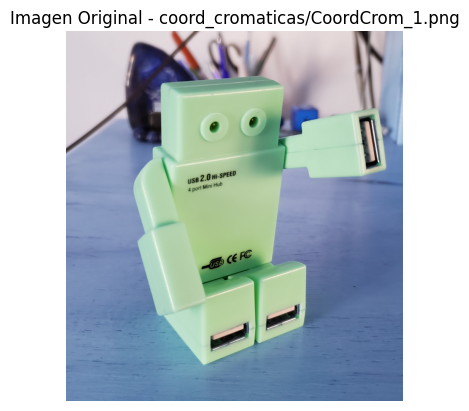

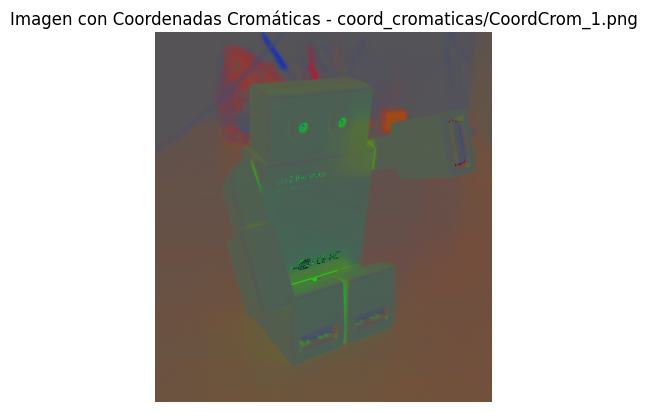

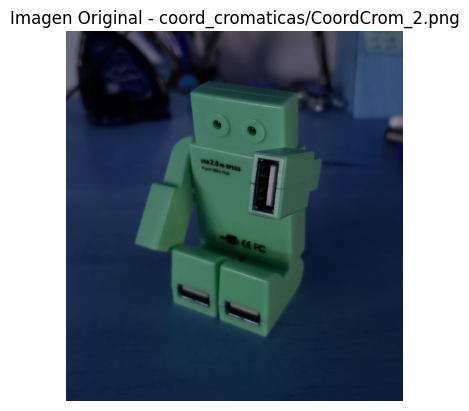

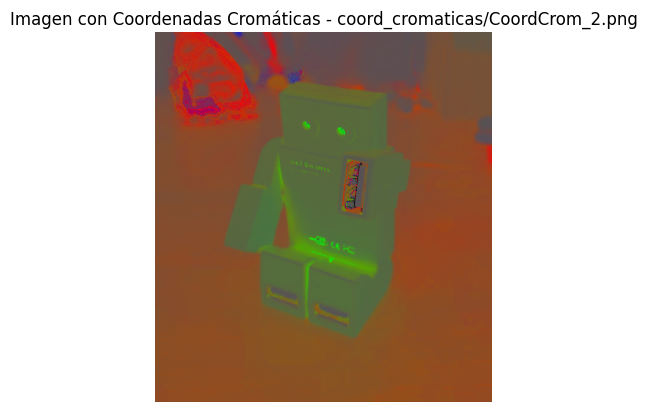

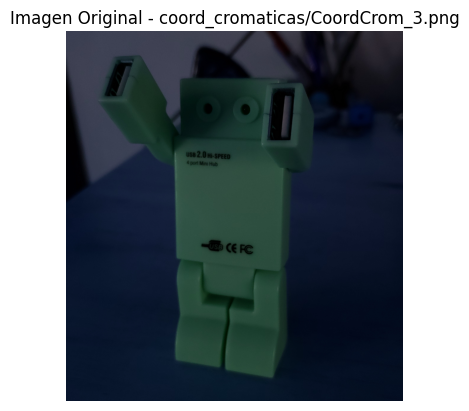

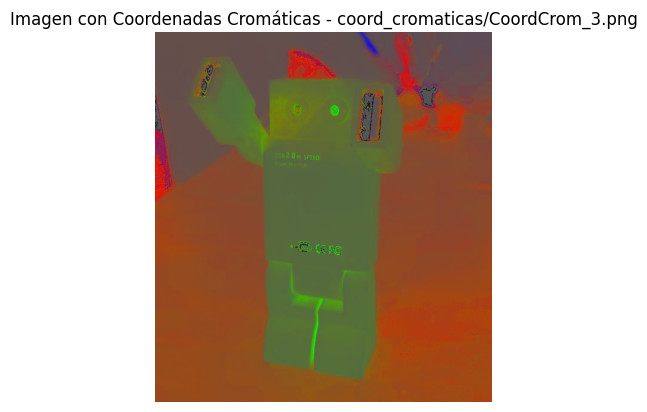

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

imagenes_coord_crom = ['coord_cromaticas/CoordCrom_1.png', 'coord_cromaticas/CoordCrom_2.png', 'coord_cromaticas/CoordCrom_3.png']

# Leer y mostrar las imágenes originales
for imagen in imagenes_coord_crom:
    imagen_actual = cv.imread(imagen)
    # Mostrar la imagen original
    plt.imshow(imagen_actual)
    plt.title(f'Imagen Original - {imagen}')
    plt.axis('off')
    plt.show()

    imagen_actual = cv.cvtColor(imagen_actual, cv.COLOR_BGR2RGB)
        
    # Pasar a Coordenadas Cromáticas
    sum_channels = np.sum(imagen_actual, axis=2, keepdims=True)
    sum_channels = np.where(sum_channels == 0, 1, sum_channels)  # Para evitar divisiones por cero
    coord_cromaticas = imagen_actual / sum_channels

    # Mostrar la imagen transformada
    plt.imshow(coord_cromaticas)
    plt.title(f'Imagen con Coordenadas Cromáticas - {imagen}')
    plt.axis('off')
    plt.show()


## Parte 1, punto 2: Implementar el algoritmo White Patch para ajustar la iluminación de las imágenes proporcionadas.
White Patch ajusta los valores de RGB en función del valor más alto en cada canal, normalizando para simular una mejor iluminación.

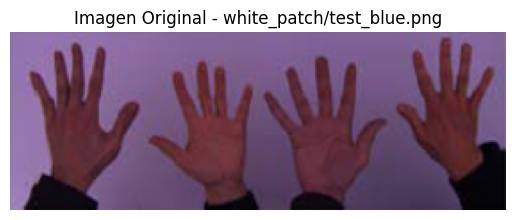

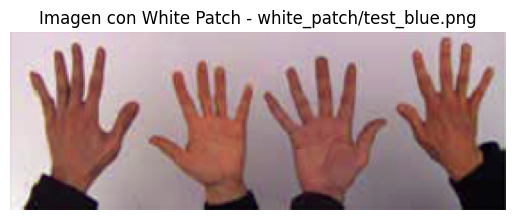

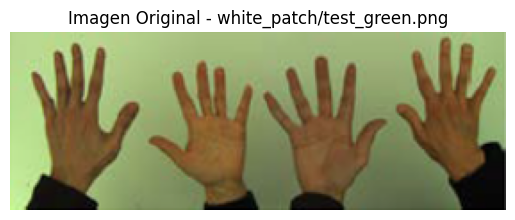

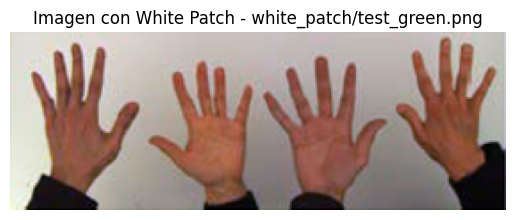

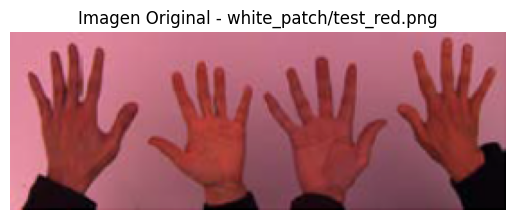

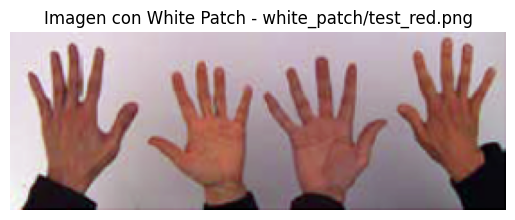

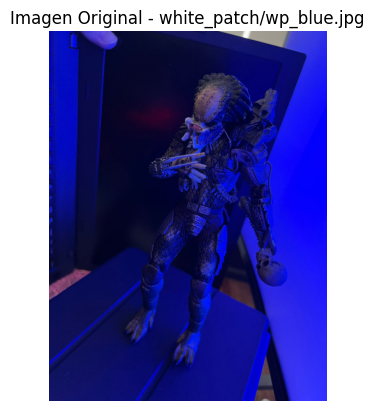

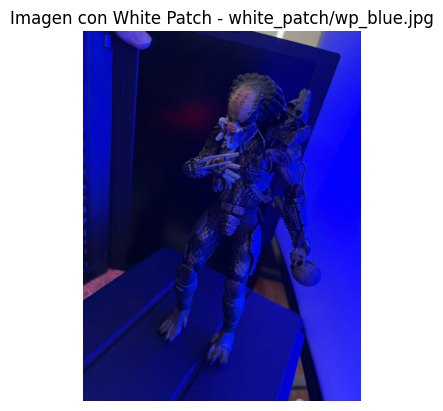

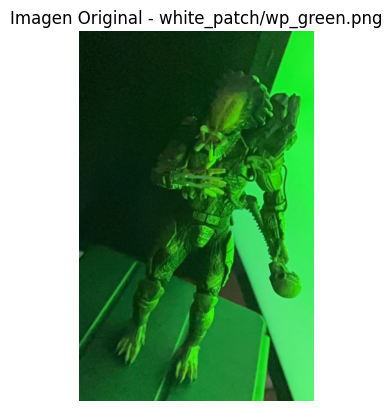

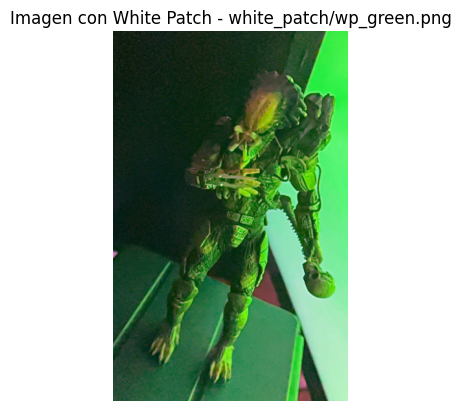

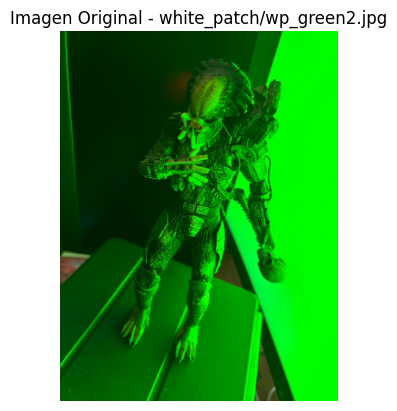

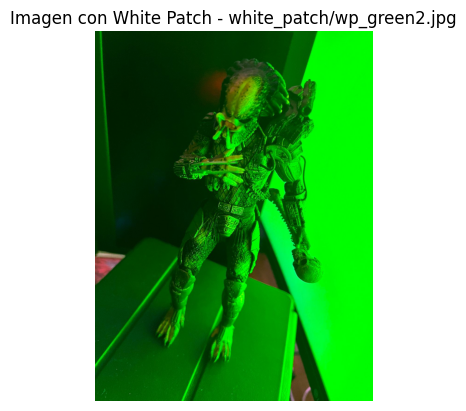

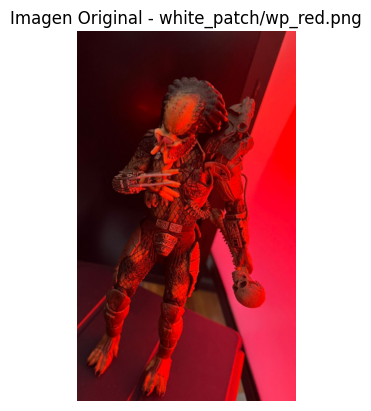

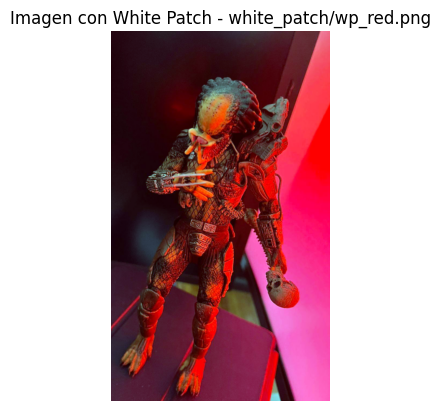

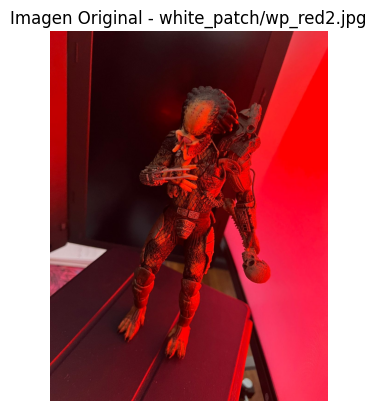

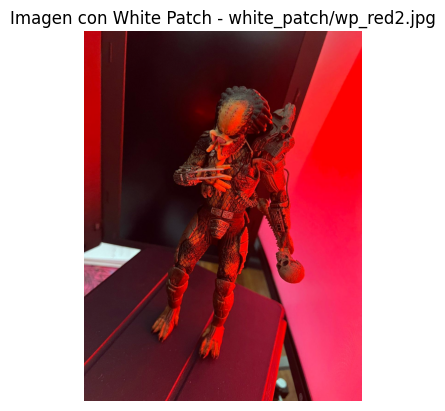

In [3]:
imagenes_wp = [
    'white_patch/test_blue.png', 'white_patch/test_green.png', 'white_patch/test_red.png',
    'white_patch/wp_blue.jpg', 'white_patch/wp_green.png', 'white_patch/wp_green2.jpg', 
    'white_patch/wp_red.png', 'white_patch/wp_red2.jpg'
]

for imagen in imagenes_wp:
    imagen_actual = cv.imread(imagen)
    imagen_actual = cv.cvtColor(imagen_actual, cv.COLOR_BGR2RGB)
    # Mostrar la imagen original
    plt.imshow(imagen_actual)
    plt.title(f'Imagen Original - {imagen}')
    plt.axis('off')
    plt.show()
    
    # Aplicar White Patch para cada canal
    max_values = np.max(imagen_actual, axis=(0, 1))  # Valores máximos de R, G, B
    white_patch_aplicado = (imagen_actual / max_values) * 255
    white_patch_aplicado = np.clip(white_patch_aplicado, 0, 255).astype(np.uint8)
    
    # Mostrar la imagen transformada
    plt.imshow(white_patch_aplicado)
    plt.title(f'Imagen con White Patch - {imagen}')
    plt.axis('off')
    plt.show()


## Parte 1, punto 3: Mostrar los resultados obtenidos y analizar las posibles fallas del algoritmo White Patch.
Los resultados obtenidos los mostramos en el punto anterior. Una posible falla de White Patch es que el algoritmo asume que el color más brillante corresponde al blanco, lo cual puede no ser cierto en algunas casos. Este supuesto podría llevar a problemas cuando no hay ningún "parche blanco" en la imagen, resultando en una corrección de color imprecisa.

## Parte 2, punto 1: Leer las imágenes 'img1_tp.png' y 'img2_tp.png' en escala de grises y visualizarlas.

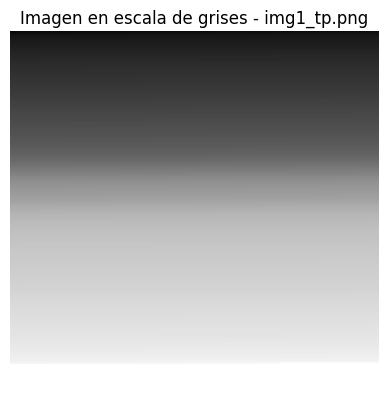

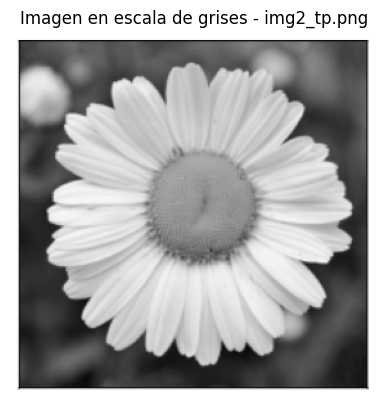

In [4]:
imagenes = ['img1_tp.png', 'img2_tp.png']

for imagen in imagenes:
    imagen_grises = cv.imread(imagen, cv.IMREAD_GRAYSCALE)
    
    # Mostrar la imagen en escala de grises
    plt.imshow(imagen_grises, cmap='gray')
    plt.title(f'Imagen en escala de grises - {imagen}')
    plt.axis('off')
    plt.show()


## Parte 2, punto 2: Elegir el número de bins y graficar histogramas.

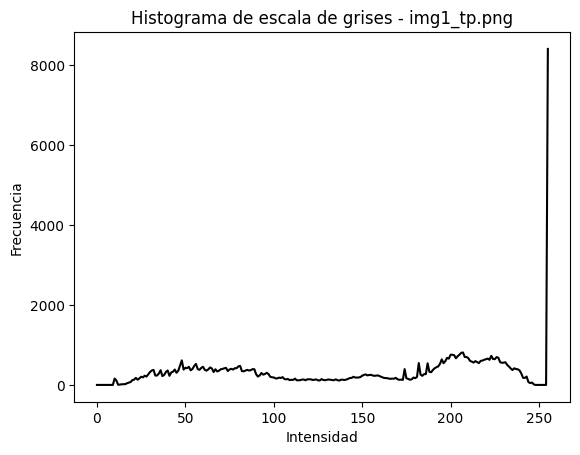

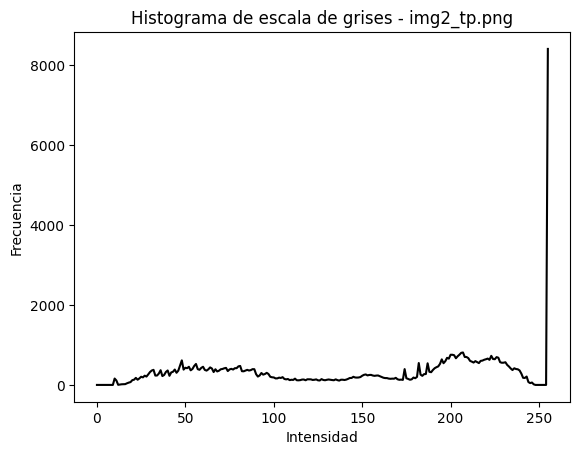

In [5]:
bins = 256  # Elegir el número de bins según el nivel de detalle que se quiere obtener

for imagen in imagenes:
    imagen_grises = cv.imread(imagen, cv.IMREAD_GRAYSCALE)
    hist = cv.calcHist([imagen_grises], [0], None, [bins], [0, 256])
    
    # Graficar el histograma
    plt.plot(hist, color='black')
    plt.title(f'Histograma de escala de grises - {imagen}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.show()


Según lo investigado, los histogramas podrían ser útiles como características para un modelo de clasificación ya que proveen información sobre la distribución de intensidad en la imagen, lo que podría ser relevante para identificar patrones globales. Sin embargo, en este ejemplo vemos claramente que para dos imágenes muy distintas entre sí al ojo humano, tenemos dos histogramas prácticamente idénticos, por lo que nosotros no usaríamos los histogramas como features ya que para casos como este podría significar predicciones incorrectas.

## Parte 2, punto 3: Análisis del histograma RGB y segmentación de elementos de la imagen 'segmentacion.png'.

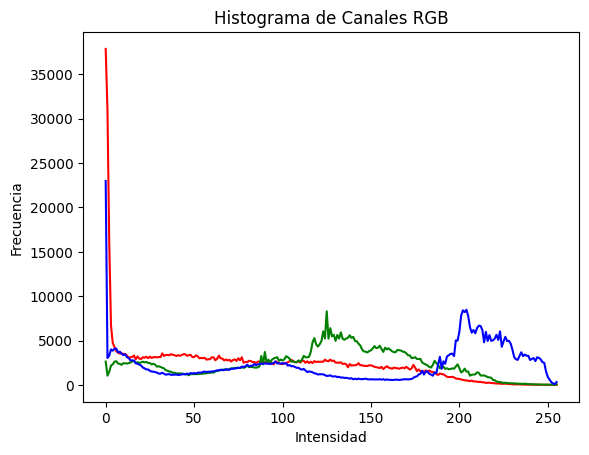

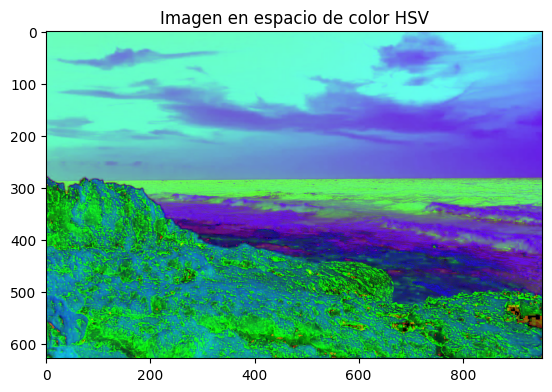

In [8]:
# Leer la imagen y analizar los canales RGB
imagen_segmentacion = cv.imread('segmentacion.png')
imagen_segmentacion = cv.cvtColor(imagen_segmentacion, cv.COLOR_BGR2RGB)

# Graficar histogramas para los canales RGB
colores = ('r', 'g', 'b')
for i, color in enumerate(colores):
    hist = cv.calcHist([imagen_segmentacion], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title('Histograma de Canales RGB')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

# Convertimos la imagen a HSV, que es un espacio de color conveniente para la discriminación
imagen_hsv = cv.cvtColor(imagen_segmentacion, cv.COLOR_RGB2HSV)
plt.figure()
plt.imshow(imagen_hsv)
plt.title('Imagen en espacio de color HSV')
plt.show()


#lower_sky = np.array([135, 180, 200])
#upper_sky = np.array([200, 255, 255])
#mask_sky = cv.inRange(imagen_segmentacion, lower_sky, upper_sky)
#segmented_sky = cv.bitwise_and(imagen_segmentacion, imagen_segmentacion, mask=mask_sky)

#plt.imshow(segmented_sky)
#plt.title('Cielo Segmentado')
#plt.axis('off')
#plt.show()


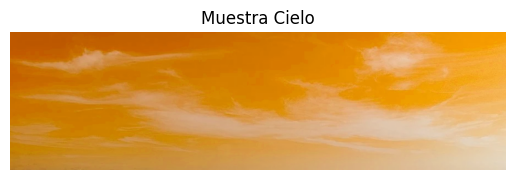

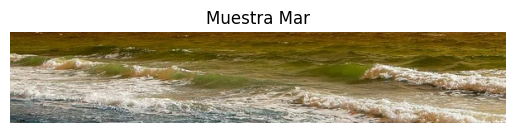

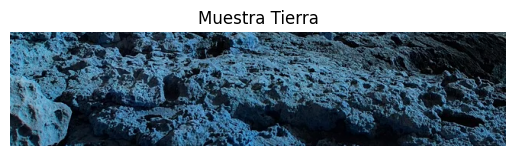

In [ ]:
# Hacemos una descripcion estadistica para cielo, mar y tierra
muestra_cielo = imagen_hsv[0:250, 0:900, :]
muestra_mar = imagen_hsv[290:400, 300:900, :]
muestra_tierra = imagen_hsv[450:600, 0:650, :]

color_h_medio_cielo, _, _ = np.mean(muestra_cielo, axis=(0,1))
color_h_medio_mar, _, _ = np.mean(muestra_mar, axis=(0,1))
color_h_medio_tierra, _, _ = np.mean(muestra_tierra, axis=(0,1))

muestra_cielo = cv.cvtColor(muestra_cielo, cv.COLOR_HSV2BGR)
muestra_mar = cv.cvtColor(muestra_mar, cv.COLOR_HSV2BGR)
muestra_tierra = cv.cvtColor(muestra_tierra, cv.COLOR_HSV2BGR)

# Mostrar las muestras para cielo, mar y tierra
plt.figure()
plt.imshow(muestra_cielo)
plt.title('Muestra Cielo')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(muestra_mar)
plt.title('Muestra Mar')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(muestra_tierra)
plt.title('Muestra Tierra')
plt.axis('off')
plt.show()

hue medio cielo:102.88964
hue medio mar:94.65992424242424
hue medio tierra:17.764410256410258


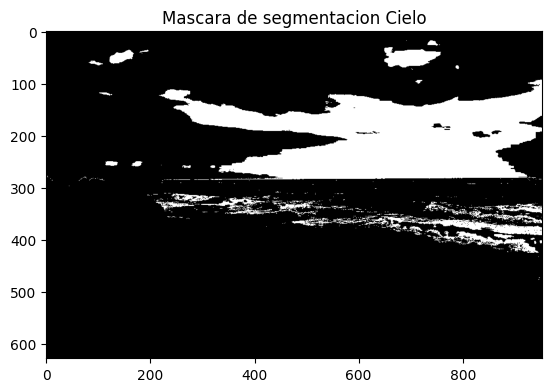

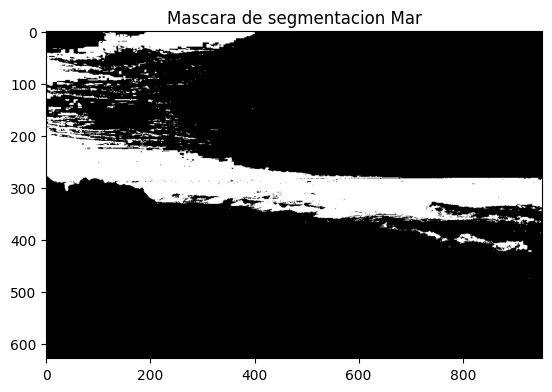

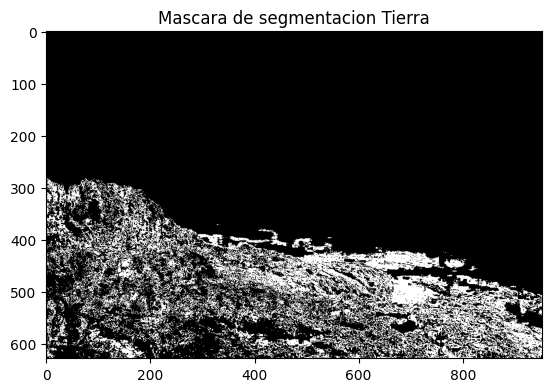

In [17]:
print(f'hue medio cielo:{color_h_medio_cielo}')
print(f'hue medio mar:{color_h_medio_mar}')
print(f'hue medio tierra:{color_h_medio_tierra}')

# Definir el rango de color para el cielo.
color_u_cielo = (color_h_medio_cielo + 10, 150, 255) # Partes más claras del cielo.
color_l_cielo = (color_h_medio_cielo - 10, 50, 150) # Partes más oscuras del cielo.

# Definir el rango de color para el mar.
color_u_mar = (color_h_medio_mar + 10, 255, 200) # Partes más claras del mar.
color_l_mar = (color_h_medio_mar - 10, 100, 50) # Partes más oscuras del mar.

# Definir el rango de color para la tierra.
color_u_tierra = (color_h_medio_tierra + 10, 150, 150) # Partes más claras de la tierra.
color_l_tierra = (color_h_medio_tierra - 10, 10, 10) # Partes más oscuras de la tierra.

# Definimos las máscaras para cada región
mask_cielo = cv.inRange(imagen_hsv, color_l_cielo, color_u_cielo)
mask_mar = cv.inRange(imagen_hsv, color_l_mar, color_u_mar)
mask_tierra = cv.inRange(imagen_hsv, color_l_tierra, color_u_tierra)

# Mostrar las máscaras
plt.figure()
plt.imshow(mask_cielo, cmap='gray')
plt.title('Mascara de segmentacion Cielo')
plt.show()

plt.figure()
plt.imshow(mask_mar, cmap='gray')
plt.title('Mascara de segmentacion Mar')
plt.show()

plt.figure()
plt.imshow(mask_tierra, cmap='gray')
plt.title('Mascara de segmentacion Tierra')
plt.show()

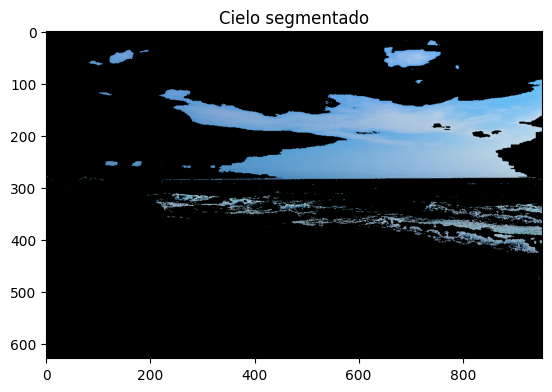

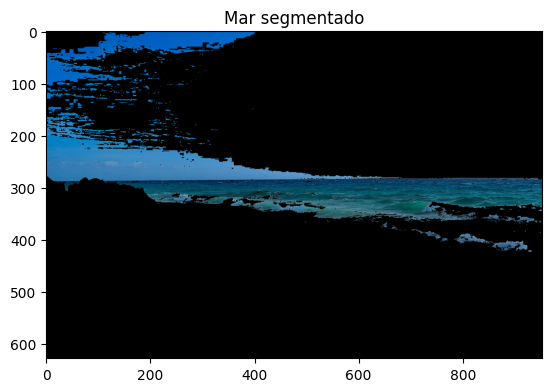

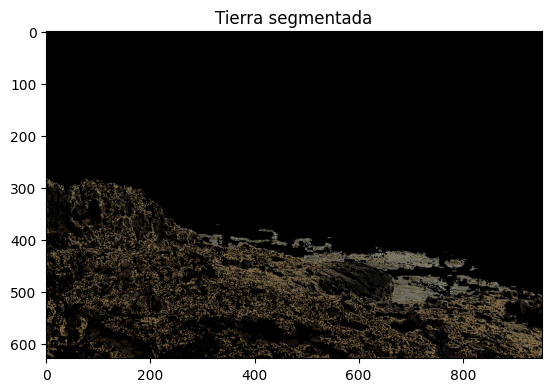

In [20]:
# Realizo la segmentación de la imagen para cada región
img_segmentada_cielo = cv.bitwise_and(imagen_segmentacion, imagen_segmentacion, mask=mask_cielo)
img_segmentada_mar = cv.bitwise_and(imagen_segmentacion, imagen_segmentacion, mask=mask_mar)
img_segmentada_tierra = cv.bitwise_and(imagen_segmentacion, imagen_segmentacion, mask=mask_tierra)

# Mostrar las imágenes segmentadas
plt.figure()
plt.imshow(img_segmentada_cielo)
plt.title('Cielo segmentado')
plt.show()

plt.figure()
plt.imshow(img_segmentada_mar)
plt.title('Mar segmentado')
plt.show()

plt.figure()
plt.imshow(img_segmentada_tierra)
plt.title('Tierra segmentada')
plt.show()

Se ve claramente que resulta complicado segmentar regiones con patrones de color similares, como el cielo y el mar. La tierra, por su parte, es claramente distinguible. Habría que jugar un poco más con los valores de s y v de cielo y mar para encontrar los valores adecuados para la segmentación correcta.